In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#Importación de librerías para cargar dataset

In [ ]:
import os
import shutil
import zipfile as zp

#Creación de carpetas

In [ ]:
path=['res','dataset']
ruta=os.path.join(*path)
if not os.path.exists(ruta):
  os.makedirs(ruta)


#Importación del zip

In [ ]:
#ruta_archivo ='/content/drive/MyDrive/Colab Notebooks/Enfermedades Cacao/Enfermedades Cacao.zip'
ruta_archivo ='/content/drive/MyDrive/Detect_cacao/archive.zip'
dir=ruta.replace('.zip','')

with  zp.ZipFile(ruta_archivo,'r') as zipp:
  zipp.extractall(dir)


#Librerías a usar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

#Importación de dataset de roboflow

In [ ]:
!curl -L "https://universe.roboflow.com/ds/6yFZS7o8Cg?key=DNULNwwKaC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3353      0 --:--:-- --:--:-- --:--:--  3361
100 2120M  100 2120M    0     0  56.5M      0  0:00:37  0:00:37 --:--:-- 67.3M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0_1_Monilia_5_jpg.rf.50181ce5713b780db49df46545acb27f.jpg  
 extracting: test/11_0_Monilia_8_jpg.rf.3bb1e4c0dec97144b34e79cd6ff395c5.jpg  
 extracting: test/13_0_Monilia_13_jpg.rf.2d3ce3baf984fed6fa278b7ac5fecf34.jpg  
 extracting: test/16_1_Fito_274_jpg.rf.6074724a52cc9d4fb465bd58cebf434c.jpg  
 extracting: test/19_0_Fito_250_jpg.rf.e0324b84b9bac43626e2cc5802118f1d.jpg  
 extracting: test/21_1_Fito_218_jpg.rf.a5bee8eb5bbd3acfba1d95a2bfcccaaf.jpg  
 extracting: test/24_1_Monilia_21_jpg.rf.1dcb82c80ea39ca4ad5f2d4a6ebc6c95.jpg  
 extracting: te

In [ ]:
!mv test res
!mv train res
!mv valid res

In [ ]:
from PIL import Image
import json
import pandas as pd

#Creamos funcion que extrae la imagen cropeada

def extract_image(file_name,bbox):
  x,y,w,h = bbox
  x = int(x)
  y= int(y)
  w = x + int(w)
  h = y + int(h)
  image = Image.open(file_name)
  image = image.crop((x,y,w,h))
  return image

def generate_df(dir):
  with open(dir) as f:
    data = json.load(f)
    df = pd.DataFrame(data['annotations'])
    df2 = pd.DataFrame(data['images'])
    df2 = df2.drop(columns=['date_captured','license'])
    df_final = df.merge(df2,left_on='image_id',right_on='id')
    df_final = df_final.drop(columns=['id_x','area','segmentation','iscrowd','id_y','image_id'])
    return df_final


In [ ]:
import pandas as pd
import os
from PIL import Image

r_nueva = '/content/n_data'
r_nueva_f ='/content/n_data/Fito'
r_nueva_m ='/content/n_data/Monilia'
r_nueva_s ='/content/n_data/Sana'

os.makedirs('/content/n_data/Fito',exist_ok=True)
os.makedirs('/content/n_data/Monilia',exist_ok=True)
os.makedirs('/content/n_data/Sana',exist_ok=True)

fito = 0
monilia = 0
sana = 0
root = '/content/res'
folders = ['test','train','valid']
for folder in folders:
  ruta = os.path.join(root,folder)
  print(ruta)
  ruta_jason = os.path.join(ruta,'_annotations.coco.json')
  df_final = generate_df(ruta_jason)
  for file in os.listdir(ruta):
    if file.endswith('.jpg'):
      file_name = os.path.join(ruta,file)
      bboxes = list(df_final[df_final['file_name']==file]["bbox"])
      clases = list(df_final[df_final['file_name']==file]["category_id"])

      for cl,bb in zip(clases,bboxes):
        if cl == 1:
        #if cl == 1 and fito <=500:
          fito+=1
          image = extract_image(file_name,bb)
          image.save(os.path.join(r_nueva_f,f'Fito_{fito}.jpg'))
        elif cl == 2:
          monilia+=1
          image = extract_image(file_name,bb)
          image.save(os.path.join(r_nueva_m,f'Monilia_{monilia}.jpg'))
        elif cl == 3:
        #elif cl == 3 and sana <=500:
          sana+=1
          image = extract_image(file_name,bb)
          image.save(os.path.join(r_nueva_s,f'Sana_{sana}.jpg'))
        else:
          continue

print(f'Cantidad de imagenes Fito: {fito}')
print(f'Cantidad de imagenes Monilia: {monilia}')
print(f'Cantidad de imagenes Sana: {sana}')



/content/res/test
/content/res/train
/content/res/valid
Cantidad de imagenes Fito: 730
Cantidad de imagenes Monilia: 483
Cantidad de imagenes Sana: 2178


#Visualización de imagenes

El formato de las bounding boxes es: clase,centrox,centroy,ancho,alto

Las clases disponibles son:['Fitoftora', 'Monilia', 'Sana']
El ancho es de 3120 y el alto de 4160
En la imagen hay 0 imagenes de Fitoftora
En la imagen hay 1 imagenes de Monilia
En la imagen hay 5 imagenes de Sana


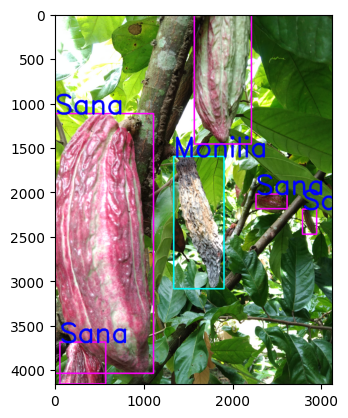

In [ ]:

path='/content/res/dataset/Enfermedades Cacao/Monilia'
path_image='/content/res/dataset/Enfermedades Cacao/Monilia/Monilia5.jpg'
path_bbox='/content/res/dataset/Enfermedades Cacao/Monilia/Monilia5.txt'
clases=[]
bboxes=[]
cls=[]
paleta_colores=[(255,0,0),(255,255,0),(255,0,255)]#Primero para fito, segundo para Monilia y el tercero para Sana
with open(os.path.join(path,'classes.txt'),'r') as t: #Abrimos un archivo en el que se nos indican las clases
  for rows in t:
    cl=rows.replace('\n','')
    clases.append(cl)
print(f'Las clases disponibles son:{clases}')
identifiers=dict(zip(range(len(clases)),clases))
img=cv2.imread(path_image)
h,w,_=img.shape
print(f'El ancho es de {w} y el alto de {h}')
with open(path_bbox,'r') as t:
  for rows in t:
    linea=np.array(rows.strip('\n').split(" "),dtype=float)
    cla,x0,y0,w0,h0=linea
    x=(x0-w0/2)*w
    y=(y0-h0/2)*h
    W=w0*w
    H=h0*h
    cv2.rectangle(img,(int(x),int(y)),(int(x+W),int(y+H)),paleta_colores[int(cla)],15)
    cv2.putText(img,identifiers[cla],(int(x), int(y)) ,cv2.FONT_HERSHEY_SIMPLEX ,10,(255,0,0),25,cv2.LINE_AA)
    #cv2.circle(img,(int(x0*w),int(y0*h)),100,(0,255,0),-1)
    cls.append(linea[0])
    bboxes.append(linea[1:])

print(f'En la imagen hay {cls.count(0)} imagenes de {clases[0]}')
print(f'En la imagen hay {cls.count(1)} imagenes de {clases[1]}')
print(f'En la imagen hay {cls.count(2)} imagenes de {clases[2]}')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()




#Subcreación de imágenes

In [ ]:
os.makedirs('/content/res/data',exist_ok=True)
os.makedirs('/content/res/data/Fito',exist_ok=True)
os.makedirs('/content/res/data/Monilia',exist_ok=True)
os.makedirs('/content/res/data/Sana',exist_ok=True)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

F, M, S = fito, monilia, sana

path = '/content/res/dataset/Enfermedades Cacao'
for carpetas in os.listdir(path):
  ruta_provisional_carpeta=os.path.join(path,carpetas)
  archivos_disponibles=(len(os.listdir(ruta_provisional_carpeta))-1)/2
  print(ruta_provisional_carpeta)
  for archivo in os.listdir(ruta_provisional_carpeta):
    ruta_archivo=os.path.join(ruta_provisional_carpeta,archivo)
    if archivo.endswith('.jpg'):
      ruta_txt = os.path.join(ruta_provisional_carpeta,archivo.replace('.jpg','.txt',))
      ruta_imagen = ruta_archivo
      image = Image.open(ruta_imagen)
      w , h = image.width, image.height
      with open(ruta_txt,'r') as t:
        for rows in t:
          linea=np.array(rows.strip('\n').split(" "),dtype=float)
          cla,x0,y0,w0,h0=linea
          x=(x0-w0/2)*w
          y=(y0-h0/2)*h
          W=w0*w
          H=h0*h
          image_crop = image.crop((int(x),int(y),int(x+W),int(y+H)))
          if cla == 0:
            image_crop.save(os.path.join(r_nueva_f,f'Fito_{F}.jpg'))
            F+=1
          elif cla == 1:
            image_crop.save(os.path.join(r_nueva_m,f'Monilia_{M}.jpg'))
            M+=1
          elif cla == 2:
          #elif cla == 2 and S <= 1000:
            image_crop.save(os.path.join(r_nueva_s,f'Sana_{S}.jpg'))
            S+=1
          else:
            continue

print(f'Cantidad de imagenes Fito: {F}')
print(f'Cantidad de imagenes Monilia: {M}')
print(f'Cantidad de imagenes Sana: {S}')






/content/res/dataset/Enfermedades Cacao/Fito
/content/res/dataset/Enfermedades Cacao/Monilia
/content/res/dataset/Enfermedades Cacao/Sana
Cantidad de imagenes Fito: 957
Cantidad de imagenes Monilia: 628
Cantidad de imagenes Sana: 3397


In [ ]:
import shutil

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 1-train_ratio-val_ratio


os.makedirs('/content/res/datos',exist_ok=True)
dir=['train','val','test']
dir2 = ['Fito','Monilia','Sana']

for r in dir:
  ruta=os.path.join('/content/res/datos',r)
  os.makedirs(ruta,exist_ok=True)
  for r2 in dir2:
    ruta_2=os.path.join(ruta,r2)
    os.makedirs(ruta_2,exist_ok=True)


In [ ]:
data_folder = '/content/n_data'

for folder in os.listdir(data_folder):
  carpeta=os.path.join(data_folder,folder)
  n_max = os.listdir(carpeta)
  conteo_imagen = 1
  for imagen in os.listdir(carpeta):
    if conteo_imagen <= int(len(n_max)*train_ratio):
      shutil.copy(os.path.join(carpeta,imagen),os.path.join('/content/res/datos/train',folder))
    elif conteo_imagen <= int(len(n_max)*(train_ratio+val_ratio)):
      shutil.copy(os.path.join(carpeta,imagen),os.path.join('/content/res/datos/val',folder))
    else:
      shutil.copy(os.path.join(carpeta,imagen),os.path.join('/content/res/datos/test',folder))
    conteo_imagen+=1

print('[INFO]: Separación exitosa')

[INFO]: Separación exitosa


In [ ]:
ruta = '/content/res/datos'

for folder in os.listdir(ruta):
  print(f'[INFO]: En la carpeta {folder} se tiene: ')
  carpeta=os.path.join(ruta,folder)
  t_archivos= 0
  for carpetas in os.listdir(carpeta):
    t_archivos+=len(os.listdir(os.path.join(carpeta,carpetas)))
    ruta_2=os.path.join(carpeta,carpetas)
    print(f'\t Para la clase {carpetas} un total de {len(os.listdir(ruta_2))}')
  print(f'\t Un total de archivos de {t_archivos}')


[INFO]: En la carpeta train se tiene: 
	 Para la clase Fito un total de 764
	 Para la clase Monilia un total de 501
	 Para la clase Sana un total de 2716
	 Un total de archivos de 3981
[INFO]: En la carpeta test se tiene: 
	 Para la clase Fito un total de 96
	 Para la clase Monilia un total de 63
	 Para la clase Sana un total de 340
	 Un total de archivos de 499
[INFO]: En la carpeta val se tiene: 
	 Para la clase Fito un total de 96
	 Para la clase Monilia un total de 63
	 Para la clase Sana un total de 340
	 Un total de archivos de 499


#Mostrando imagen a una input deseada

In [ ]:
import cv2

path='/content/res/datos/test/Fito/Fito_141.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
plt.axis('off')
plt.imshow(img)
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


#Librerías a usar

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils                         import img_to_array
from tensorflow.keras.preprocessing.image           import ImageDataGenerator
from tensorflow.keras.preprocessing                 import image
from tensorflow.keras.models                        import Sequential
from tensorflow.keras                               import layers
from tensorflow.keras.optimizers                    import Adam
from tensorflow.keras.callbacks                     import EarlyStopping
from tensorflow.keras.callbacks                     import ReduceLROnPlateau
from sklearn.metrics                                import classification_report

#Funcion para visualizar métricas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x_test, batch_size=128)
  print(classification_report(y_test, predictions.argmax(axis=1)))

#Dirección de la carpeta con los datos separados

In [ ]:
dir_train = '/content/res/datos/train'
dir_val = '/content/res/datos/val'
dir_test = '/content/res/datos/test'

#Creamos los image generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale= 1.0/255.0,
)
val_generator = ImageDataGenerator(
    rescale= 1.0/255.0,
)
test_generator = ImageDataGenerator(
    rescale= 1.0/255.0,
)


#Hiperparámetros de entrenamiento

In [ ]:
#Hiperparámetros para el entrenamiento
epochs = 100
batch_size = 32
clases_disponibles = 3
#Hiperparámetros para el optimizador
lr = 0.005
#lr=0.001
weight_decay = 0.0001
#Hiperparámetros para el callback
monitor="val_loss"
patience = 5

#Aplicando Transfer-Learning

## Importando la ResNet101

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import ResNet101V2
#Importando base model
#base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224,224,3))
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.summary()



Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                        

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras        import layers

#Congelamos los pesos del modelo
base_model.trainable = False
#Creamos el nuevo modelo
pre_trained_model = Sequential()
#Agregamos la base model
pre_trained_model.add(base_model)
#Agregamos las capas de la red neuronal
#Agregamos la capa del GlobalAveragePooling2D
pre_trained_model.add(layers.GlobalAveragePooling2D())

pre_trained_model.add(layers.Dense(clases_disponibles, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 42632707 (162.63 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
#Agregamos los optimizadores y callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

#Compilando el modelo
pre_trained_model.compile(optimizer=Adam(learning_rate=lr,
                                         weight_decay=weight_decay),
                          loss = 'categorical_crossentropy',
                          metrics=["accuracy"])

#Definimos los callbacks
callback = EarlyStopping(monitor=monitor,patience=patience,restore_best_weights=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=3, verbose=1, min_delta=1e-4)


#Entrenamiento de la red

Found 3981 images belonging to 3 classes.
Found 499 images belonging to 3 classes.
Epoch 1/100
125/125 [==============================] - 46s 307ms/step - loss: 0.5411 - accuracy: 0.8149 - val_loss: 0.4619 - val_accuracy: 0.8257 - lr: 0.0050
Epoch 2/100
125/125 [==============================] - 35s 281ms/step - loss: 0.2724 - accuracy: 0.9020 - val_loss: 0.3247 - val_accuracy: 0.8737 - lr: 0.0050
Epoch 3/100
125/125 [==============================] - 39s 312ms/step - loss: 0.2204 - accuracy: 0.9181 - val_loss: 0.2921 - val_accuracy: 0.8878 - lr: 0.0050
Epoch 4/100
125/125 [==============================] - 35s 277ms/step - loss: 0.1645 - accuracy: 0.9440 - val_loss: 0.2922 - val_accuracy: 0.8938 - lr: 0.0050
Epoch 5/100
125/125 [==============================] - 35s 282ms/step - loss: 0.1530 - accuracy: 0.9495 - val_loss: 0.2536 - val_accuracy: 0.9118 - lr: 0.0050
Epoch 6/100
125/125 [==============================] - 35s 276ms/step - loss: 0.1013 - accuracy: 0.9656 - val_loss: 0.2653

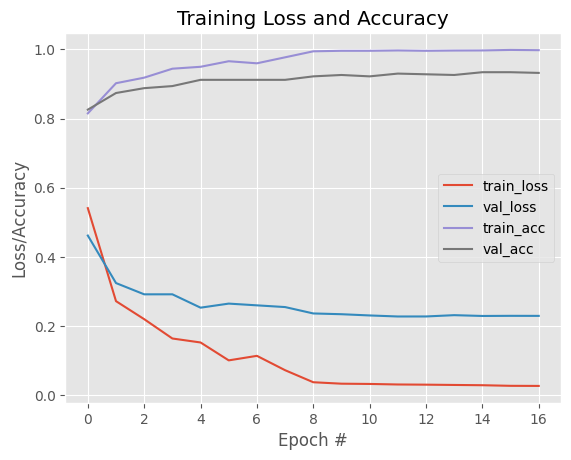

In [ ]:
#Entrenamos la red
clases = os.listdir(dir_train)


#Entrenamos la red
H = pre_trained_model.fit(train_generator.flow_from_directory(dir_train,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 classes=clases,
                                                 class_mode = 'categorical',
                                                 batch_size=batch_size),
             epochs=epochs,
             #steps_per_epoch = n_datos_training//batch_size,
             validation_data = val_generator.flow_from_directory(dir_val,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 classes=clases,
                                                 shuffle = True,
                                                 class_mode = 'categorical',
                                                 batch_size=batch_size),
             callbacks=[callback,reduce_lr])
#Learning curves
visualize_learning_curve(H)

#Evaluando en el conjunto de test

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def evaluate_model(model):
  print("[INFO]: Evaluando red neuronal...")

  dir_test = '/content/res/datos/test'
  test_set=test_generator.flow_from_directory(dir_test,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 classes=clases,
                                                 class_mode = 'categorical',
                                                 batch_size=batch_size,
                                              shuffle=False)
  predictions = model.predict_generator(test_set)
  cm = confusion_matrix(test_set.classes, predictions.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
  disp.plot()
  plt.axis("off")
  plt.show()
  print(classification_report(test_set.classes, predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...
Found 499 images belonging to 3 classes.


<ipython-input-43-5c539f02c402>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_set)


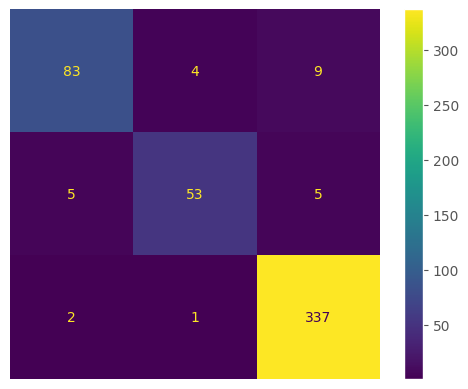

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        96
           1       0.91      0.84      0.88        63
           2       0.96      0.99      0.98       340

    accuracy                           0.95       499
   macro avg       0.93      0.90      0.91       499
weighted avg       0.95      0.95      0.95       499



In [ ]:
evaluate_model(pre_trained_model)

#Guardando el modelo

In [ ]:
BASE_FOLDER = '/content/drive/My Drive/Redes_neuronales_y_deep_learning/'
pre_trained_model.save(BASE_FOLDER + "Cacao_cnn.f5")
